In [50]:
import numpy as np 
import matplotlib.pyplot as plt


def quad1(a, b, c):
    
    x0 = (-b + np.sqrt(b**2 - 4*a*c))/(a*2)
    x1 = (-b - np.sqrt(b**2 - 4*a*c))/(a*2)
    
    return x0, x1

def quad2(a, b, c):
    x0 = -2*c/(b + np.sqrt(b**2 - 4 * a * c ))
    x1 = -2*c/(b - np.sqrt(b**2 - 4 * a * c ))
    
    return x0, x1

In [53]:
a = b = 1

x0 = []
x1 = []
x2 = []
x3 = []

for i in range(1, 18):
    _x0, _x1 = quad1(a, b, 1*10**(-i))
    _x2, _x3 = quad2(a, b, 1*10**(-i))
    x0.append(_x0)
    x1.append(_x1)
    x2.append(_x2)
    x3.append(_x3)
    print('i = ', i)
    print("quad1 x0: ", _x0)
    print("quad1 x1: ", _x1)
    print("quad2 x0: ", _x2)
    print("quad2 x1: ", _x3)
    
    
    



i =  1
quad1 x0:  -0.1127016653792583
quad1 x1:  -0.8872983346207417
quad2 x0:  -0.11270166537925831
quad2 x1:  -0.8872983346207418
i =  2
quad1 x0:  -0.010102051443364402
quad1 x1:  -0.9898979485566356
quad2 x0:  -0.01010205144336438
quad2 x1:  -0.9898979485566336
i =  3
quad1 x0:  -0.0010010020050140178
quad1 x1:  -0.998998997994986
quad2 x0:  -0.001001002005014042
quad2 x1:  -0.9989989979950102
i =  4
quad1 x0:  -0.00010001000200049459
quad1 x1:  -0.9998999899979994
quad2 x0:  -0.00010001000200050015
quad2 x1:  -0.9998999899980551
i =  5
quad1 x0:  -1.0000100002016676e-05
quad1 x1:  -0.9999899998999979
quad2 x0:  -1.000010000200005e-05
quad2 x1:  -0.9999899998983355
i =  6
quad1 x0:  -1.000001000006634e-06
quad1 x1:  -0.999998999999
quad2 x0:  -1.000001000002e-06
quad2 x1:  -0.999998999994366
i =  7
quad1 x0:  -1.0000000999488279e-07
quad1 x1:  -0.99999989999999
quad2 x0:  -1.00000010000002e-07
quad2 x1:  -0.9999999000511821
i =  8
quad1 x0:  -1.0000000105758744e-08
quad1 x1:  -0.99

/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


<font size="5">Machine precision reached at 1 * 10 ** 16
or i = 16.

Using binomial aprox. to find analyitic solution for x-intercepts 

\begin{equation*}
\sqrt{1 + 4c} = (1 + 2c) 
\end{equation*}

therefore

for quad1:

\begin{equation*}
x_{0} = \frac{-1 + (1 - 2c) }{ 2} = -c \\
\end{equation*}

\begin{equation*}
x_{1} = \frac{-1 - (1 - 2c) }{2} = c - 1 \\
\end{equation*}

for quad2:
\begin{equation*}
x_{0} = \frac{-2c}{1 +(1-2c)} = \frac{-c}{1-c} \\
\end{equation*}

\begin{equation*}
x_{1} = \frac{-2c}{1-(1-2c)} = - 1 \\
\end{equation*}

</font>

In [80]:
def theo1x0(c):
    return -c
def theo1x1(c):
    return(c-1)
def theo2x0(c):
    return -c/(1-c)
def theo2x1(c):
    return -1

In [81]:
# arrays for analytic solutions
t1x0 = []
t1x1 = []
t2x0 = []
t2x1 = []

# arrays for numerical solutions
n1x0 = []
n1x1 = []
n2x0 = []
n2x1 = []

# arrays for relative errors
resid1x0 = []
resid1x1 = []
resid2x0 = []
resid2x1 = []

carr = []

for i in range(1, 17):
    c = 10 ** (-i)
    carr.append(c)
    
    t1x0.append(theo1x0(c))
    t1x1.append(theo1x1(c))    
    t2x0.append(theo2x0(c))    
    t2x1.append(theo2x1(c))
    
    _x0, _x1 = quad1(a, b, 1*10**(-i))
    _x2, _x3 = quad2(a, b, 1*10**(-i))
    n1x0.append(_x0)
    n1x1.append(_x1)    
    n2x0.append(_x2)    
    n2x1.append(_x3)
    
    resid1x0.append(np.abs((theo1x0(c) - _x0)/theo1x0(c)))
    resid1x1.append(np.abs((theo1x1(c) - _x1)/theo1x1(c)))
    resid2x0.append(np.abs((theo2x0(c) - _x2)/theo2x0(c)))
    resid2x1.append(np.abs((theo2x1(c) - _x3)/theo2x1(c)))

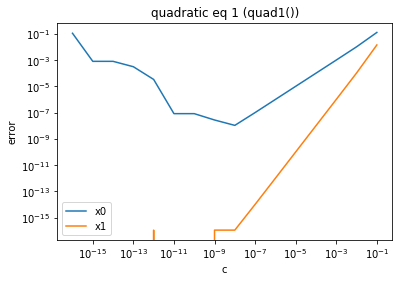

In [84]:
plt.plot(carr, resid1x0)
plt.plot(carr, resid1x1)
plt.xscale('log')
plt.yscale('log')
plt.title('quadratic eq 1 (quad1())')
plt.xlabel('c')
plt.ylabel('error')
plt.legend(['x0','x1'])


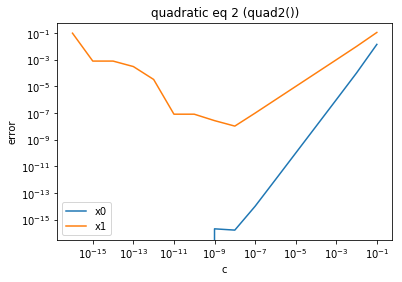

In [86]:
plt.plot(carr, resid2x0)
plt.plot(carr, resid2x1)
plt.xscale('log')
plt.yscale('log')
plt.title('quadratic eq 2 (quad2())')
plt.xlabel('c')
plt.ylabel('error')
plt.legend(['x0','x1'])
